# Support Vector Machines

- supervised learning algorithm



- uses a **linear model** & a **linear decision boundary** / **hyperplane** that wants to seperate classes in training data optimal




- best **hyperplane** $\rightarrow$ **largest margin** $\rightarrow$ distance to each datapoint on each side is maximized



## Goal

- find the hyperplane so that the distance to both classes is maximized



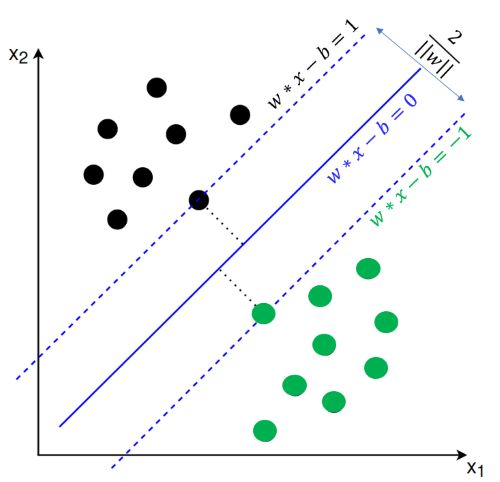

# Linear Model

**description of the hyperplane:**


$$
w \cdot x - b = 0 \quad (1.1)
$$



$$
\\
w \cdot x_i - b \geq 1 \text{ if $y_i$}{ = 1} \quad (1.2)
$$


$$
\\
w \cdot x_i - b \geq -1 \text{ if $y_i$}{ = -1} \quad (1.3)
$$



function must satisfy the condition to be **>=1** for **class 1** (1.2)

and **<= -1** for **class -1** (1.3)





**results into equation:**

$$
y_i(w \cdot x_i - b) \geq 1 \quad (1.4)
$$

# cost function



- to come up with weights and biases


- use the following cost function and apply gradient descent:

### Hinge Loss


- if a datapoint **is** correctly classified, $y \cdot f(x)$ will be $\geq 1$, then $l = 0$




- if a datapoint **is not** correctly classified, the loss is the result of the linear function (1.6)

$$
loss = max(0,1-y_i(f(x))) \quad (1.5)
$$


$$
\rightarrow \ with \ (1.4):  loss = max(0,1-y_i(w \cdot x_i - b)) \quad (1.6)
$$

$$ loss =  \begin{cases}
0 & \text{if}, y \cdot f(x) \geq 1 \\ 1-y \cdot f(x) & \text{otherwise}
\end{cases} $$

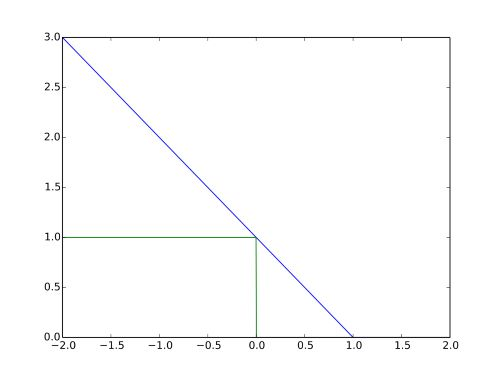

to **maximize the margin** $\frac{2}{||w||}$ we need to **minimize the magnitude** $w$

$
J = \lambda ||w||  ^2 + \frac{1}{n} \sum_{i=1}^{n} max(0,1-y_i(w \cdot x_i - b)) \quad (1.7)
$





$
\rightarrow 
$
if $\quad y_i \cdot f(x) \geq 1:$






$J_i = \lambda ||w||^2 \quad (1.8)$





$\rightarrow$
otherwise:




$
J_i = \lambda ||w||^2 + 1 - y_i (w \cdot x_i - b) \quad (1.9)
$

$ \lambda: $ tries to find a trade-off between $||w||^2$ and the other Hinge-loss term; says which of these is more important

## Gradient Descent

$
\rightarrow
$
if $ \quad y_i \cdot f(x) \geq 1: $  

$  \frac{dJ_i}{dw_k} = 2 \lambda w_k \quad (1.10)$


$ \frac{dJ_i}{db} = 0 \quad (1.11)$



$\rightarrow$ else: 

$ \frac{dJ_i}{dw_k}=2 \lambda w_k - y_i \cdot x_i \quad (1.12)$

$ \frac{dJ_i}{db} = y_i \quad (1.13)$



### Update Rule for Gradient Descent:


$ w = w - \alpha \cdot dw \quad (1.14)\\
b = b - \alpha \cdot db \quad (1.15)
$


In [18]:
import numpy as np

class SVM:
    def __init__(self, learning_rate = 0.0001, lambda_parameter = 0.001, n_iterations = 3000):
        self.learning_rate = learning_rate
        self.lambda_parameter = lambda_parameter
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    # function that contains the training step & the gradient descent
    def fit(self, X, y):
        # we only want to different between classes -1 and 1. for this, we need to make sure, that the given
        # training y-vector only contains those values. y_binarised will be = -1 if y <= 0, else = 1
        y_binarised = np.where(y <= 0, -1, 1)
        
        # X is a n-d-array, with n = number of samples and d = number of features in each sample
        self.n_samples, self.n_features = X.shape
        
        # initialize weights and bias
        # for each feature column we will have 1 weight, but we will only have 1 scalar bias        
        self.weights = np.zeros(self.n_features)
        self.bias = 0
        
        # perform gradient descent applying (1.14) & (1.15) for n_iterations times. the following steps need to
        # be applied in each iteration:
        # 1) for each training sample, check if the condition 𝑦𝑖⋅𝑓(𝑥)≥1 is satisfied
        # 2) if so, apply equations (1.10) & (1.11)
        # 3) if not, apply equations (1.12) & (1.13)
        # 4) apply equations (1.14) & (1.15)
        
        for _ in range(self.n_iterations):
            
            # loop over every training x-sample
            for sample_index, sample in enumerate(X):
                
                # 1)
                # create a bool-condition, that stores the value True, if 𝑦𝑖⋅𝑓(𝑥)≥1, else False
                condition = y_binarised[sample_index] * np.dot(sample, self.weights) - self.bias >= 1
                
                # 2)
                # if 𝑦𝑖⋅𝑓(𝑥)≥1 
                if condition:
                    dw = 2 * self.lambda_parameter * self.weights 
                    db = 0
                    
                # 3)
                else:
                    dw = 2 * self.lambda_parameter * self.weights - np.dot(sample, y_binarised[sample_index])
                    db = y_binarised[sample_index]
                    
                # 4)  
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db                   
    
    def predict(self, X):
        # according to (1.2) and (1.3), the classification will be class -1, 
        # if a linear output is negative and +1, if a linear output is positive.
        # first, calculate the linear output according to (1.1)
        linear_output = np.dot(X, self.weights) - self.bias
        
        # np.sign returns -1 if x < 0, 0 if x==0, 1 if x > 0
        return np.sign(linear_output) 

# Test the model

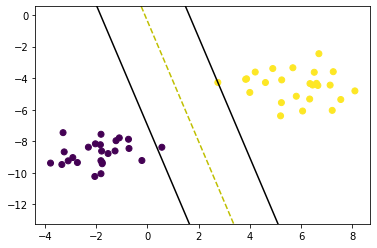

In [19]:
import matplotlib.pyplot as plt
from sklearn import datasets

X, y = datasets.make_blobs(n_samples = 50, n_features = 2, centers = 2, cluster_std = 1.05, random_state = 40)
y_train = np.where(y == 0, -1, 1)

# instantiate a new model object & apply the training data on it
svm_model = SVM()
svm_model.fit(X, y_train)


def visualize_svm():
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]

        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])

        x1_1 = get_hyperplane_value(x0_1, svm_model.weights, svm_model.bias, 0)
        x1_2 = get_hyperplane_value(x0_2, svm_model.weights, svm_model.bias, 0)

        x1_1_m = get_hyperplane_value(x0_1, svm_model.weights, svm_model.bias, -1)
        x1_2_m = get_hyperplane_value(x0_2, svm_model.weights, svm_model.bias, -1)

        x1_1_p = get_hyperplane_value(x0_1, svm_model.weights, svm_model.bias, 1)
        x1_2_p = get_hyperplane_value(x0_2, svm_model.weights, svm_model.bias, 1)

        ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
        ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
        ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

        x1_min = np.amin(X[:, 1])
        x1_max = np.amax(X[:, 1])
        ax.set_ylim([x1_min - 3, x1_max + 3])

        plt.show()

visualize_svm()